In [105]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import Dataframe

In [4]:
filepath = "../Sentinel-2/Multi-size Mosaic_resampled.tif"
raster = rasterio.open(filepath)

In [77]:
# Plot a band

dim = raster.read(1).shape

def show_img(df, band):
    s = np.array(df[band]).reshape(dim)
    plt.imshow(s, cmap = 'terrain')
    plt.colorbar()
    
    return s
    

In [74]:
def threshold(band):
    if band.name == 'NDVI':
        thr_band = np.array([0 if (i > 0) else 1 for i in band]).reshape(dim)
    else:
        thr_band = np.array([1 if (i > 0) else 0 for i in band]).reshape(dim)
    plt.figure()
    plt.imshow(thr_band, cmap = 'Blues')
    
    return thr_band

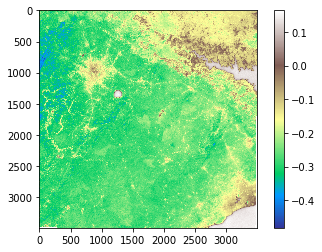

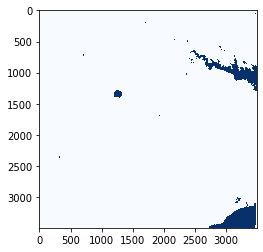

In [79]:
df = Dataframe.main(raster)

ndwi = show_img(df, 'NDWI')
t_ndwi = threshold(df['NDWI'])

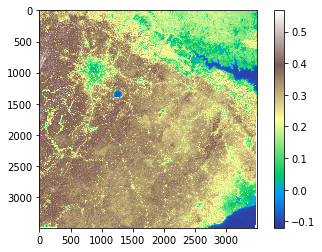

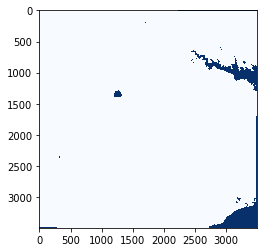

In [62]:
show_img(df, 'NDVI')
t_ndvi = threshold(df['NDVI'])

In [46]:
filepath2 = "../Sentinel-2/27-01-2020/27-01-2020_resampled.tif"
raster2 = rasterio.open(filepath2)

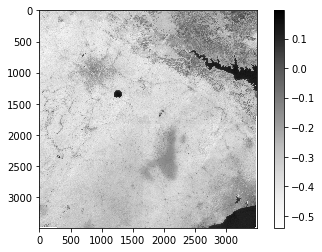

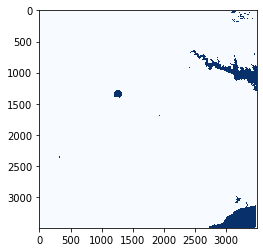

In [49]:
df2 = Dataframe.main(raster2)

show_img(df2, 'NDWI')
threshold(df2['NDWI']);

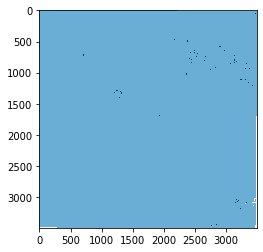

In [45]:
plt.imshow(t_ndwi - t_ndvi, cmap = 'Blues')

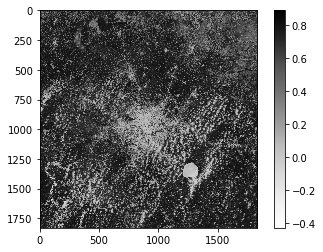

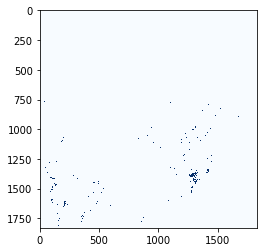

In [54]:
filepath3 = "../Sentinel-2/02-04-2019/S2B_2A_NW_resampled.tif"
raster3 = rasterio.open(filepath3)
dim = raster3.read(1).shape

df3 = Dataframe.main(raster3)

show_img(df3, 'NDVI')
threshold(df3['NDVI']);

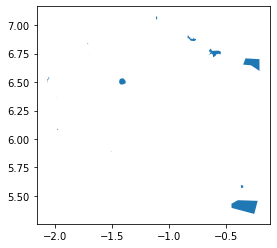

In [152]:
water_path = "../Sentinel-2/07-01-2020/Shapefiles/Water_Polygon.shp"
water = gpd.read_file(water_path)
water.plot()

In [153]:
from rasterio.mask import mask
out_img, out_transform = mask(raster, water['geometry'], crop=True)

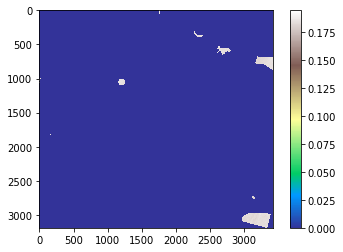

In [154]:
import pandas as pd

dim = out_img[0].shape

def shape_to_df(raster, names):
    df = pd.DataFrame()
    
    for band,name in zip(raster, names):
        df[name] = band.flatten()
    
    return df 

df_shp = shape_to_df(out_img, df.columns)
show_img(df_shp, 'B1');
    

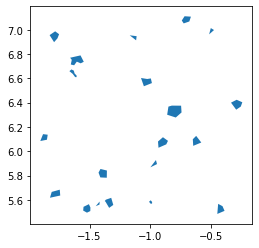

In [155]:
ground_path = "../Sentinel-2/07-01-2020/Shapefiles/Earth_Polygon.shp"
ground = gpd.read_file(ground_path)
ground.plot()

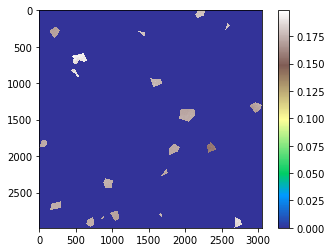

In [157]:
out_img, out_transform = mask(raster, ground['geometry'], crop=True)
dim = out_img[0].shape
df_shp = shape_to_df(out_img, df.columns)
show_img(df_shp, 'B1');